In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


1. Display Top 10 Rows of The Dataset
2. Check Last 10 Rows of The Dataset
3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
5. Fetch Random Sample From the Dataset (50%)
6. Check Null Values In The Dataset
7. Perform Data Cleaning [ Replace '?' with NaN ]

8. Drop all The Missing Values
9. Check For Duplicate Data and Drop Them


In [2]:
df=pd.read_csv('adult.csv')

In [3]:
df.head(10
       )

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.isnull().sum()
#but it doesnt mean they have zero null values 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
#in formula 
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

### custom function for checking null values as '?'

In [8]:

def ques(val):
    lst=[]
    for i in val:
        if i=='?':
            lst.append(True)
        else:
            lst.append(False)
        
    return lst


lst=df.columns
for i in lst:
    print(i,end=' ')
    lst=ques(df[i])
    val=pd.Series(lst)
    print(val.sum())
    
    

age 0
workclass 2799
fnlwgt 0
education 0
educational-num 0
marital-status 0
occupation 2809
relationship 0
race 0
gender 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 857
income 0


In [9]:
#without converting it into series for adding 
lst=df.columns
for i in lst:
    print(i,end=' ')
    lsst=ques(df[i])
    print(sum(lsst))

age 0
workclass 2799
fnlwgt 0
education 0
educational-num 0
marital-status 0
occupation 2809
relationship 0
race 0
gender 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 857
income 0


In [10]:
#replacing ? with NaN
df1=df.replace('?',np.nan)
df1
df1.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

## total percentage of null values 

In [11]:
val=df1.isnull().sum()
val.sum()/len(df)*100


13.236558699479955

## percentage of mising values in each column

In [12]:
per_missing=round(df1.isnull().sum()/len(df1)*100,3)
per_missing

age                0.000
workclass          5.731
fnlwgt             0.000
education          0.000
educational-num    0.000
marital-status     0.000
occupation         5.751
relationship       0.000
race               0.000
gender             0.000
capital-gain       0.000
capital-loss       0.000
hours-per-week     0.000
native-country     1.755
income             0.000
dtype: float64

In [13]:
#random datas 50%
val=df1.sample(frac=0.5,random_state=1)
print('shape',val.shape)
val.head()

shape (24421, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
391,31,Private,224234,HS-grad,9,Never-married,Transport-moving,Own-child,Black,Male,0,0,40,United-States,<=50K
1899,25,Private,149486,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Male,0,0,40,United-States,<=50K
24506,36,Self-emp-not-inc,343721,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,30,NaN,>50K
32816,26,NaN,131777,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,2002,40,United-States,<=50K
47892,30,Local-gov,44566,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [14]:
df1=df1.dropna(how='any')

print(df.shape)
print(df1.shape)
df1.isnull().sum()

# how means can be any no in rows for it to be true 

(48842, 15)
(45222, 15)


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [15]:
val=df1.shape
val2=df.shape
ans=(val[0]/val2[0]*100)
print(round(100-ans,3))
# the percent of the data lost in cleaning it 



7.412


In [16]:
val=df1[df1.duplicated()]
val

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [17]:
print(val.all())
val.any() #its basically or operation checks if anyonoe is tru or not 


age                 True
workclass           True
fnlwgt              True
education           True
educational-num     True
marital-status      True
occupation          True
relationship        True
race                True
gender              True
capital-gain       False
capital-loss       False
hours-per-week      True
native-country      True
income              True
dtype: bool


age                 True
workclass           True
fnlwgt              True
education           True
educational-num     True
marital-status      True
occupation          True
relationship        True
race                True
gender              True
capital-gain       False
capital-loss       False
hours-per-week      True
native-country      True
income              True
dtype: bool

In [18]:
df1.duplicated().any() 

True

In [ ]:
df1.duplicated().sum()

In [19]:
df1=df1.drop_duplicates()


In [20]:
df1.duplicated().any()

False

### part 2 

10. Get Overall Statistics About The Dataframe
11. Drop The Columns education-num, capital-gain, and capital-loss
12. What Is The Distribution of Age Column?
13. Find Total Number of Persons Having Age Between 17 To 48 (Inclusive) Using Between Method
14. What is The Distribution of Workclass Column?
15. How Many Persons Having Bachelors and Masters Degree?
16. Bivariate Analsis
17. Replace Salary Values With 0 and 1
18. Which Workclass Getting The Highest Salary?
19. How Has Better Chance To Get Salary greater than 50K Male or Female?
20. Covert workclass Columns Datatype To Category Datatype

In [21]:
df1.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [23]:

df1.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [24]:
#reason for droping all this columns 
df1.drop(['educational-num','capital-gain','capital-loss'],axis=1,inplace=True)

# univariate analysis 


In [26]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:>

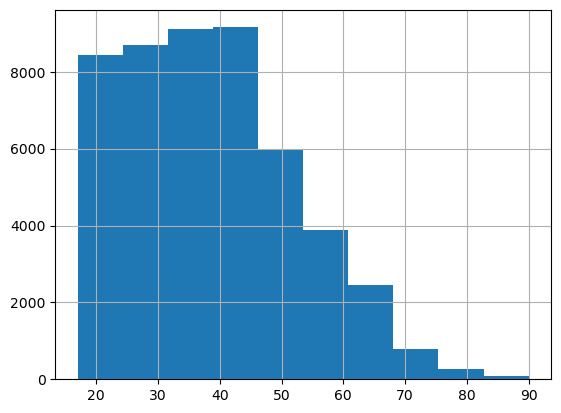

In [27]:
df['age'].hist()

In [40]:
val=df['age'].between(17,48)
len(df[val])

37321

In [38]:
df['workclass'].describe()

count       48842
unique          9
top       Private
freq        33906
Name: workclass, dtype: object

<AxesSubplot:>

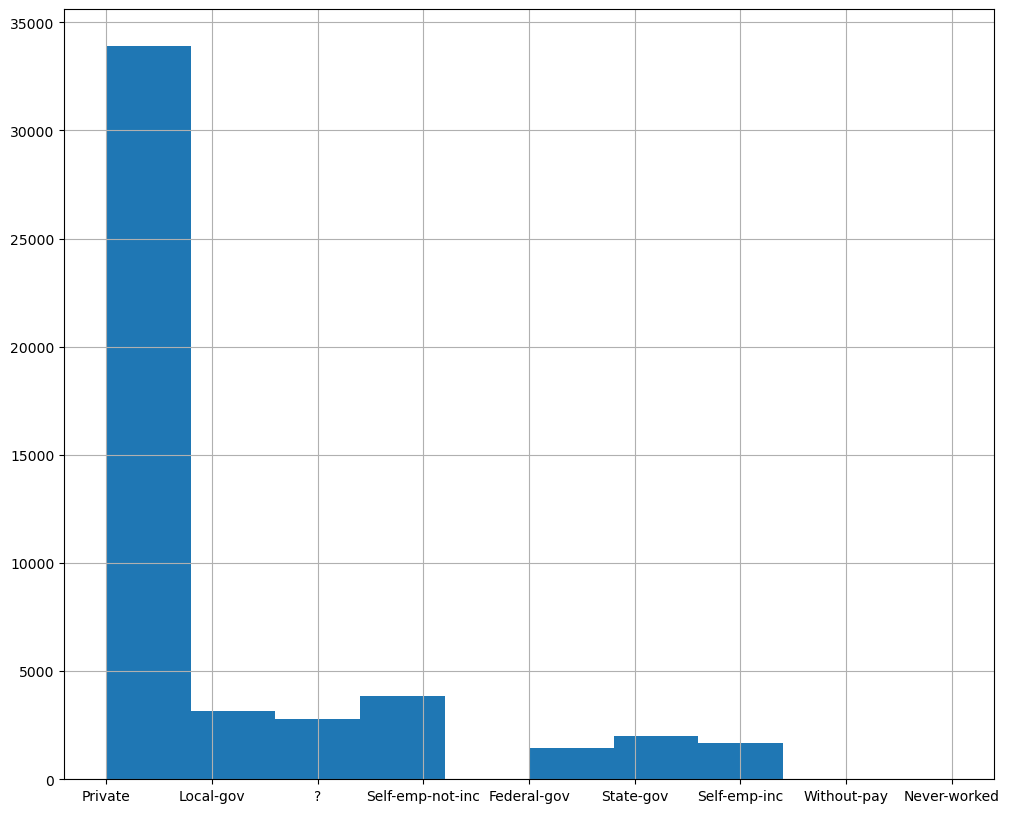

In [42]:
plt.figure(figsize=(12,10))
df['workclass'].hist()

In [43]:
df.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [49]:
val=df['education'].isin(['Bachelors','Masters'])
len(df['education'][val])

10682

In [51]:
filter1=df['education']=='Bachelors'
filter2=df['education']=='Masters'
len(df[filter1|filter2])

10682

# bivariate analysis 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='age'>

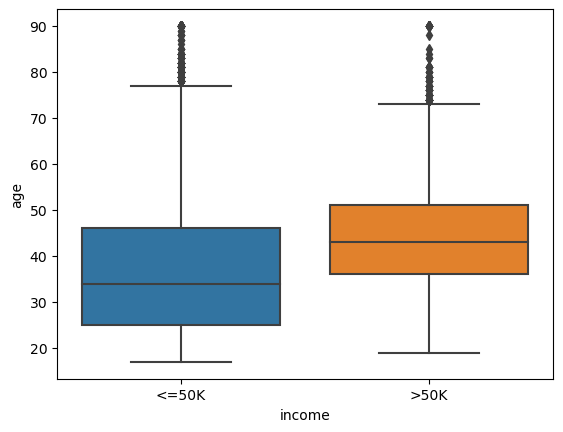

In [53]:
#relationship b/w salary and age 
sns.boxplot(df.income,df.age)

In [60]:
df1['salary']=df1['income'].replace({'<=50K':0,'>50K':1})

In [62]:
df1

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,1
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0


In [63]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [75]:
#HIGHEST SALARY 
df1.groupby('workclass')['salary'].mean()

workclass
Federal-gov         0.390469
Local-gov           0.295161
Private             0.217816
Self-emp-inc        0.554407
Self-emp-not-inc    0.279051
State-gov           0.267215
Without-pay         0.095238
Name: salary, dtype: float64

In [74]:
df1.groupby('gender',sort=True)['salary','income'].sum()

C:\Users\raosa\AppData\Local\Temp\ipykernel_20040\1837927181.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby('gender',sort=True)['salary','income'].sum()


,salary
gender,
Female,1669
Male,9533


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  int64  
 1   workclass        48842 non-null  object 
 2   fnlwgt           48842 non-null  int64  
 3   education        48842 non-null  object 
 4   educational-num  48842 non-null  int64  
 5   marital-status   48842 non-null  object 
 6   occupation       48842 non-null  object 
 7   relationship     48842 non-null  object 
 8   race             48842 non-null  object 
 9   gender           48842 non-null  object 
 10  capital-gain     48842 non-null  int64  
 11  capital-loss     48842 non-null  int64  
 12  hours-per-week   48842 non-null  int64  
 13  native-country   48842 non-null  object 
 14  income           48842 non-null  object 
 15  salary           45175 non-null  float64
dtypes: float64(1), int64(6), object(9)
memory usage: 6.0+ MB


In [78]:
df1['workclass']=df1['workclass'].astype('category')

In [79]:
df1.info() #notice the memory 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45175 non-null  int64   
 1   workclass       45175 non-null  category
 2   fnlwgt          45175 non-null  int64   
 3   education       45175 non-null  object  
 4   marital-status  45175 non-null  object  
 5   occupation      45175 non-null  object  
 6   relationship    45175 non-null  object  
 7   race            45175 non-null  object  
 8   gender          45175 non-null  object  
 9   hours-per-week  45175 non-null  int64   
 10  native-country  45175 non-null  object  
 11  income          45175 non-null  object  
 12  salary          45175 non-null  int64   
dtypes: category(1), int64(4), object(8)
memory usage: 5.5+ MB
